In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import math


In [ ]:
# # Replace with your dataset path
# df = pd.read_csv('/content/sample_data/dengue data 17-07-2025.csv')
# labels = pd.read_csv('/content/sample_data/dengue data 17-07-2025.csv')

# # Merge features and labels on city, year, and weekofyear
# df = df.merge(labels, on=['city', 'year', 'weekofyear'])

# # Convert to datetime
# df['week_start_date_x'] = pd.to_datetime(df['week_start_date_x'])

# # Sort by date to maintain time order
# df = df.sort_values('week_start_date_x')

# df.head()

/tmp/ipython-input-3-1052287229.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['week_start_date_x'] = pd.to_datetime(df['week_start_date_x'])


,city,year,weekofyear,week_start_date_x,ndvi_ne_x,ndvi_nw_x,ndvi_se_x,ndvi_sw_x,precipitation_amt_mm_x,reanalysis_air_temp_k_x,...,reanalysis_relative_humidity_percent_y,reanalysis_sat_precip_amt_mm_y,reanalysis_specific_humidity_g_per_kg_y,reanalysis_tdtr_k_y,station_avg_temp_c_y,station_diur_temp_rng_c_y,station_max_temp_c_y,station_min_temp_c_y,station_precip_mm_y,total_cases_y
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [5]:
# Load your single CSV (update the filename as needed)
df = pd.read_csv('/content/sample_data/dengue data 17-07-2025.csv')

# Ensure date is datetime
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

# Sort for time series order
df = df.sort_values(['city', 'week_start_date'])
df.head()


/tmp/ipython-input-5-1684414174.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['week_start_date'] = pd.to_datetime(df['week_start_date'])


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [44]:
# Choose a city: 'sj' (San Juan) or 'iq' (Iquitos)
city = 'sj'  # Change this to 'iq' for Iquitos

# Filter data for the selected city
city_df = df[df['city'] == city].reset_index(drop=True)


In [45]:
# Drop non-numeric and unnecessary columns
city_df = city_df.drop(columns=['city', 'year', 'weekofyear', 'week_start_date'])

# Fill missing values
city_df = city_df.fillna(method='ffill')

# Feature and target columns
features = [
    'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
    'precipitation_amt_mm', 'reanalysis_air_temp_k',
    'reanalysis_relative_humidity_percent',
    'reanalysis_sat_precip_amt_mm',
    'reanalysis_specific_humidity_g_per_kg',
    'reanalysis_tdtr_k',
    'station_avg_temp_c', 'station_diur_temp_rng_c',
    'station_max_temp_c', 'station_min_temp_c',
    'station_precip_mm'
]

target = 'total_cases'

# Normalize features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(city_df[features])
scaled_target = city_df[[target]].values

# Combine
scaled_df = np.hstack((scaled_features, scaled_target))


/tmp/ipython-input-45-702060501.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_df = city_df.fillna(method='ffill')


In [8]:
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len, :-1])
        y.append(data[i+seq_len, -1])
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(scaled_df, sequence_length)


In [9]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [31]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 10, 32)         │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,497 (56.63 KB)

 Trainable params: 14,497 (56.63 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=14,
    validation_data=(X_test, y_test),
    # callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 4115.1953 - val_loss: 1320.9203
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3540.0479 - val_loss: 1217.4572
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5651.3716 - val_loss: 1167.8882
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5139.2256 - val_loss: 1129.6541
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3866.2336 - val_loss: 1097.0437
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3417.1631 - val_loss: 1069.2233
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3419.2427 - val_loss: 1047.0181
Epoch 8/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3819.6648 - val_loss: 1028.8241
Epoch 9/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3019.5005 - val_loss: 1014.7485
Epoch 10/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3367.5308 - val_loss: 1002.7714
Epoch 11/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3756.2561 - val_loss: 994.25

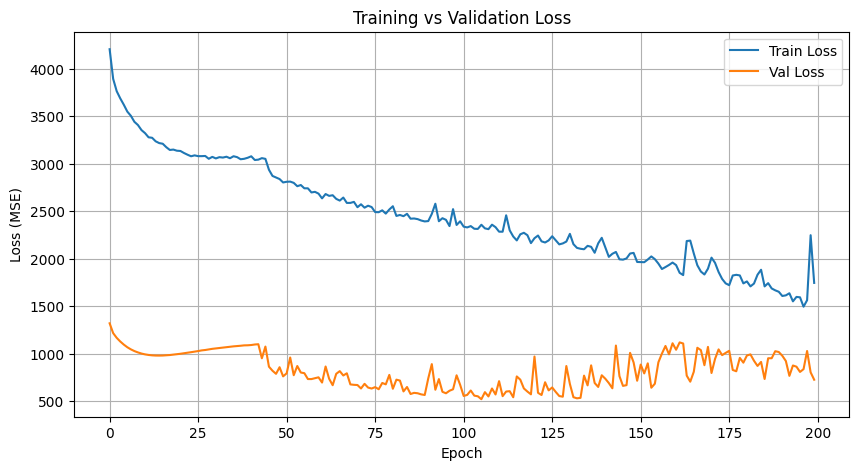

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


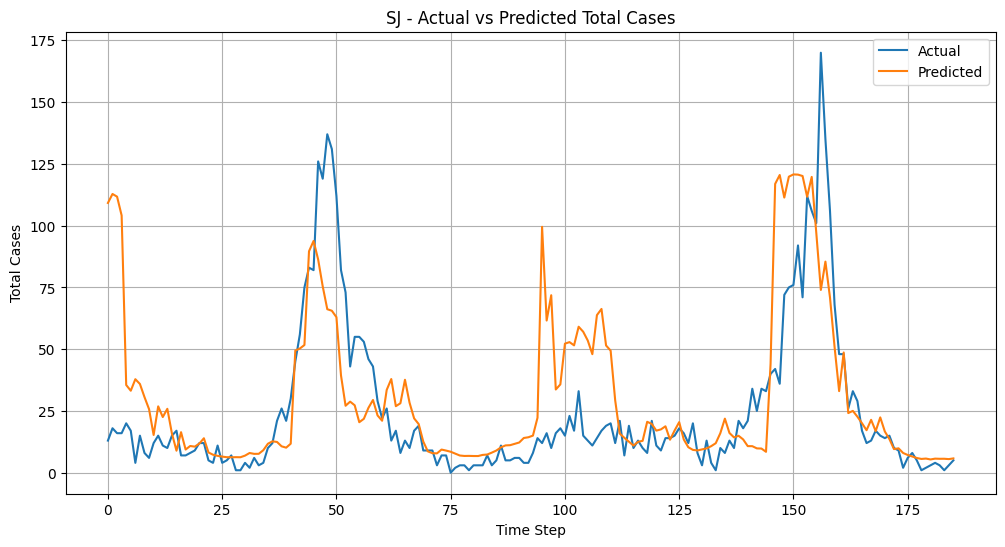

In [35]:
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'{city.upper()} - Actual vs Predicted Total Cases')
plt.xlabel('Time Step')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


MSE: 727.80
RMSE: 26.98
MAE: 16.36


MSE: 695.01 RMSE:26.36 MAE: 17.49 when LSTM LAYER 1:64,LAYER2:36  MSE: 805.78 RMSE: 28.39 MAE: 19.25 LSTM LAYER 1:64,LAYER2:64

Enter week for forecast : 19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


ValueError: x and y must have same first dimension, but have shapes (10,) and (19,)

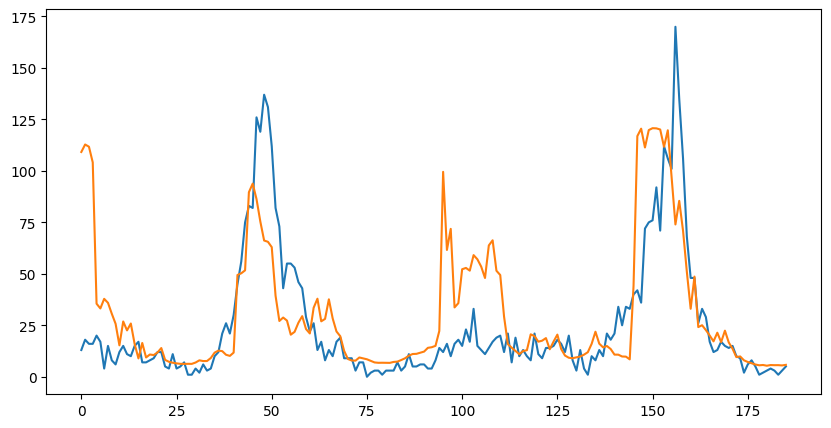

In [47]:
def forecast_future(model, last_seq, n_steps):
    preds = []
    curr_seq = last_seq.copy()

    for _ in range(n_steps):
        pred = model.predict(curr_seq[np.newaxis, :, :])[0, 0]
        preds.append(pred)

        # update sequence by removing first and adding predicted
        next_seq = np.append(curr_seq[1:], [curr_seq[-1]], axis=0)
        next_seq[-1][-1] = pred
        curr_seq = next_seq

    return preds

step=int(input("Enter week for forecast : "))
# Forecast next 10 weeks
forecast = forecast_future(model, X_test[-1], n_steps=step)

plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_test)), y_pred.flatten(), label='Predicted')
plt.plot(range(len(y_test), len(y_test) + 10), forecast, label='Forecast (10 weeks)', linestyle='--')
plt.title(f'{city.upper()} - Actual, Predicted & Forecast')
plt.legend()
plt.grid(True)
plt.show()
